# 資料介紹

> Students and faculty at Cornell College in Mount Vernon, Iowa, collected data over many years at the hawk blind at Lake MacBride near Iowa City, Iowa. The data set that we are analyzing here is a subset of the original data set, using only those species for which there were more than 10 observations. Data were collected on random samples of three different species of hawks: Red-tailed, Sharp-shinned, and Cooper's hawks.

## 來源文件

https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/Hawks.html

## 使用欄位

| 欄位 | 說明 |
| -- | -- | 
| Year |  Year: 1992-2003 |
| Species |   CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned |
| Age |   A=Adult or I=Imature |
| Sex |   F=Female or M=Male |
| Wing |  Length (in mm) of primary wing feather from tip to wrist it attaches to |
| Weight |  Body weight (in gm) |
| Culmen |  Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird |
| Hallux |  Length (in mm) of the killing talon |
| Tail |  Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center) |

## 隼種類

| Cooper | Red-tailed | Sharp-Shinned |
| -- | -- | -- |
| ![cooper](https://i.imgur.com/yElU0mT.jpeg) | ![red-tailed](https://i.imgur.com/stDkmjH.jpeg) | ![Sharp-Shinned](https://i.imgur.com/NXFkDbt.jpeg)|

## 資料預覽

### 載入資料

In [ ]:
install.packages("data.table")
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 從網路位置下載資料
hawks <- fread("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Hawks.csv", 
                select = c('Species', 'Age', 'Sex', 'Wing', 'Hallux', 'Weight', 'Tail', 'Year'), data.table = F, stringsAsFactors = T)

# 空字串應為 NA 值
hawks[hawks == ""] <- NA

# 僅取部分資料顯示
head(hawks, 10)

,Species,Age,Sex,Wing,Hallux,Weight,Tail,Year
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
1,RT,I,NA,385,30.1,920,219,1992
2,RT,I,NA,376,NA,930,221,1992
3,RT,I,NA,381,31.3,990,235,1992
4,CH,I,F,265,23.5,470,220,1992
5,SS,I,F,205,14.3,170,157,1992
6,RT,I,NA,412,32.2,1090,230,1992
7,RT,I,NA,370,30.1,960,212,1992
8,RT,A,NA,375,30.0,855,243,1992
9,RT,A,NA,412,31.3,1210,210,1992


### 資料概覽

In [ ]:
summary(hawks)

 Species  Age       Sex           Wing           Hallux           Weight      
 CH: 70   A:224       :  0   Min.   : 37.2   Min.   :  9.50   Min.   :  56.0  
 RT:577   I:684   F   :174   1st Qu.:202.0   1st Qu.: 15.10   1st Qu.: 185.0  
 SS:261           M   :158   Median :370.0   Median : 29.40   Median : 970.0  
                  NA's:576   Mean   :315.6   Mean   : 26.41   Mean   : 772.1  
                             3rd Qu.:390.0   3rd Qu.: 31.40   3rd Qu.:1120.0  
                             Max.   :480.0   Max.   :341.40   Max.   :2030.0  
                             NA's   :1       NA's   :6        NA's   :10      
      Tail            Year     
 Min.   :119.0   Min.   :1992  
 1st Qu.:160.0   1st Qu.:1995  
 Median :214.0   Median :1999  
 Mean   :198.8   Mean   :1998  
 3rd Qu.:225.0   3rd Qu.:2001  
 Max.   :288.0   Max.   :2003  
                               

### 調整資料內容

In [ ]:
# 將年份轉為類別資料
hawks$Year <- as.factor(hawks$Year)

# 移除空白的 level
hawks$Sex <- droplevels(hawks$Sex)

In [ ]:
summary(hawks)

 Species  Age       Sex           Wing           Hallux           Weight      
 CH: 70   A:224   F   :174   Min.   : 37.2   Min.   :  9.50   Min.   :  56.0  
 RT:577   I:684   M   :158   1st Qu.:202.0   1st Qu.: 15.10   1st Qu.: 185.0  
 SS:261           NA's:576   Median :370.0   Median : 29.40   Median : 970.0  
                             Mean   :315.6   Mean   : 26.41   Mean   : 772.1  
                             3rd Qu.:390.0   3rd Qu.: 31.40   3rd Qu.:1120.0  
                             Max.   :480.0   Max.   :341.40   Max.   :2030.0  
                             NA's   :1       NA's   :6        NA's   :10      
      Tail            Year    
 Min.   :119.0   1994   :129  
 1st Qu.:160.0   2000   :117  
 Median :214.0   2003   :109  
 Mean   :198.8   2002   : 99  
 3rd Qu.:225.0   1999   : 86  
 Max.   :288.0   2001   : 84  
                 (Other):284  

### 資料分布

In [ ]:
install.packages("patchwork")
library(patchwork)
library(ggplot2)
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.res = 160)

blank_theme <- theme_minimal() + theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
)

draw_pie <- function(d, title){
    df <- as.data.frame(table(d, useNA = "ifany"), row.names = NULL)
    colnames(df) <- c("var", "freq")
    
    value <- df$freq
    group <- df$var

    pie <- ggplot(df, aes(x="", y=value, fill=group))+ geom_bar(width = 1, stat = "identity") + coord_polar(theta = "y")
    pie + labs(title=title) + theme_gray() + blank_theme
}

draw_density <- function(x, title){
    ggplot(hawks, aes(x=x)) + geom_density() + labs(title=title) + scale_y_continuous(labels = percent, name = "percent") + theme_gray()
}

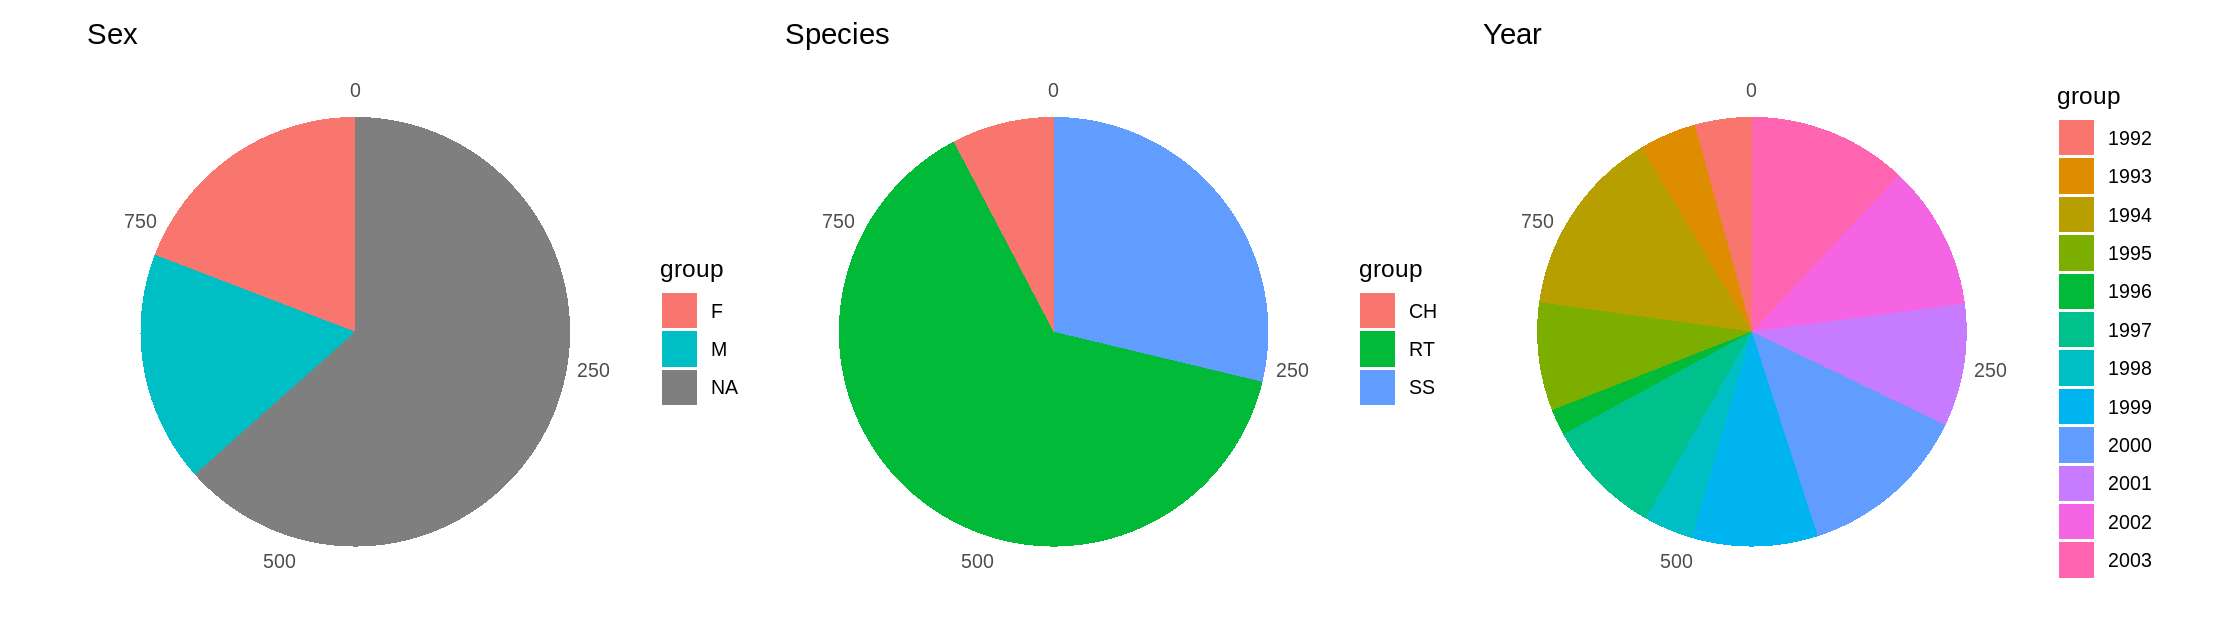

In [ ]:
g0 <- draw_pie(hawks$Sex, "Sex")
g1 <- draw_pie(hawks$Species, "Species")
g2 <- draw_pie(hawks$Year, "Year")

g0 + g1 + g2

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”
Warning message:
“Removed 6 rows containing non-finite values (stat_density).”
Warning message:
“Removed 10 rows containing non-finite values (stat_density).”


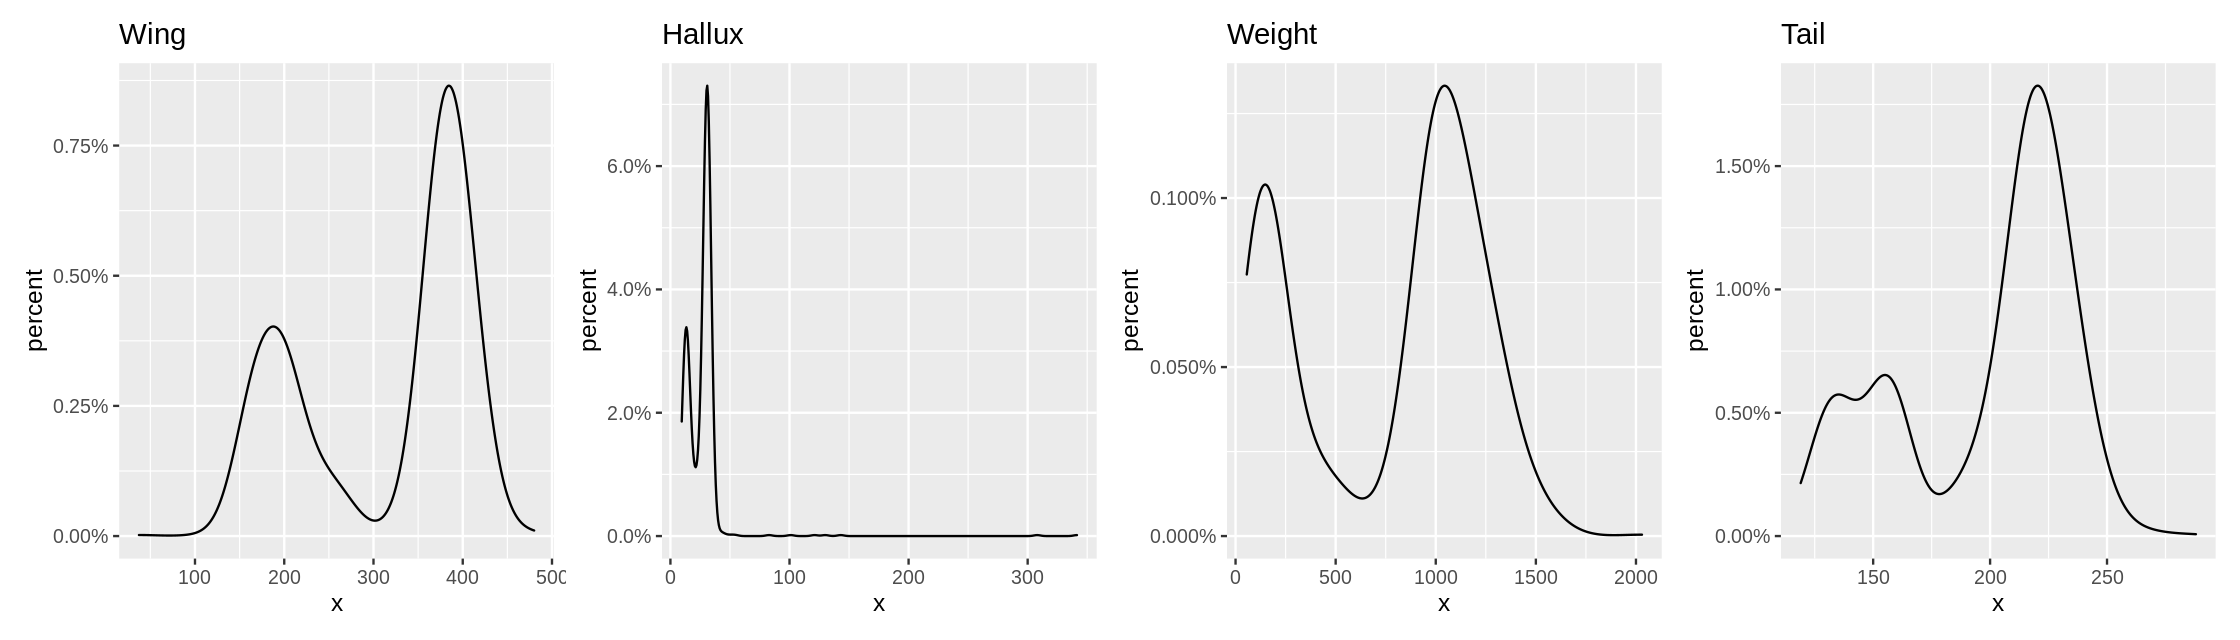

In [ ]:
g3 <- draw_density(hawks$Wing, "Wing")
g4 <- draw_density(hawks$Hallux, "Hallux")
g5 <- draw_density(hawks$Weight, "Weight")
g6 <- draw_density(hawks$Tail, "Tail")

g3 + g4 + g5 + g6 + plot_layout(ncol = 4)